In [1]:
import contracts
contracts.disable_all()

In [2]:
import duckietown_uplan as uplan

INFO:dt-uplan:duckietown_uplan 1.0.0
INFO:dt-world:duckietown-world 1.0.15
DEBUG:dt-serialization:Registering class Serializable
DEBUG:dt-serialization:Registering class GenericData
DEBUG:dt-serialization:Registering class Sequence
DEBUG:dt-serialization:Registering class SampledSequence
DEBUG:dt-serialization:Registering class Constant
DEBUG:dt-serialization:Registering class RectangularArea
DEBUG:dt-serialization:Registering class TransformSequence
DEBUG:dt-serialization:Registering class VariableTransformSequence
DEBUG:dt-serialization:Registering class SE2Transform
DEBUG:dt-serialization:Registering class Scale2D
DEBUG:dt-serialization:Registering class Matrix2D
DEBUG:dt-serialization:Registering class SpatialRelation
DEBUG:dt-serialization:Registering class GroundTruth
DEBUG:dt-serialization:Registering class PlacedObject
DEBUG:dt-serialization:Registering class EvaluatedMetric
DEBUG:dt-serialization:Registering class GenericObject
DEBUG:dt-serialization:Registering class Duckie
D

In [3]:
%%html
<style>
pre {line-height: 90%}
</style>

In [4]:
import duckietown_world as dw
from duckietown_world.svg_drawing.ipython_utils import ipython_draw_html

In [5]:
dw.logger.setLevel(50)

In [6]:
current_map = dw.load_map('4way')

In [7]:
dt = uplan.DuckieTown(current_map)

In [8]:
current_map.tile_size

0.585

In [9]:
dt.draw_map_with_lanes()

In [10]:
#now augment the world more
dt.augment_graph()

In [11]:
dt.draw_map_with_lanes()

In [12]:
uplan.draw_graphs([dt.get_map_current_graph(), dt.get_map_original_graph()], 
                 node_colors=['red', 'yellow'], edge_colors=['black', 'blue'])

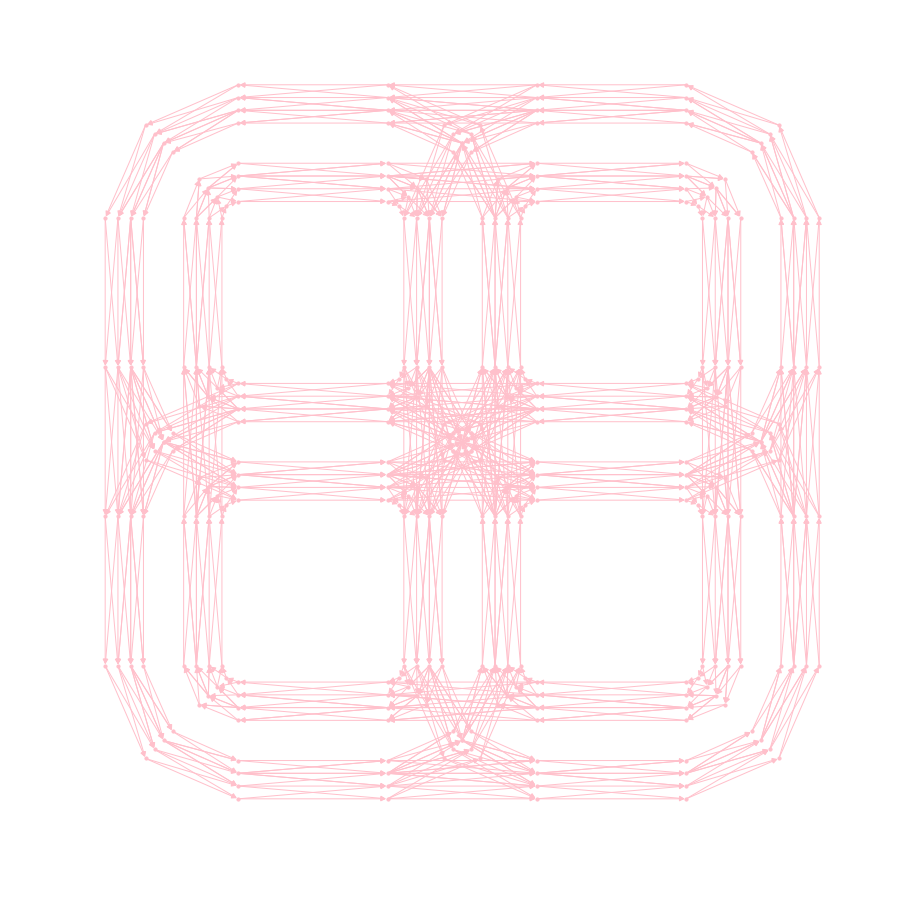

In [13]:
dt.render_current_graph()

In [14]:
dt.spawn_random_duckie(1)

In [15]:
# from duckietown_world.geo.transforms import SE2Transform
# #Lets spawn some duckies here
# dt.spawn_duckie(SE2Transform([0.16379999399185186, 2.1], -2.61799))
# dt.spawn_duckie(SE2Transform([0.26, 1.75], -1.61799))
# dt.spawn_duckie(SE2Transform([2.5, 2.1], 1.91799))
# dt.spawn_duckie(SE2Transform([1.12, 2.1], 1.91799))
# dt.spawn_duckie(SE2Transform([0.16379999399185186, 1.8], 0))

In [16]:
# dt.render_current_graph()

In [17]:
#plan a path for one duckiebot and move it
my_duckie = dt.get_duckie(0)
my_duckie.set_visible_path(True)

In [18]:
print(my_duckie.current_position)
print(my_duckie.current_path)

SE2Transform([2.339999943971634, 2.503799937963486],-2.4492935913962e-16)
[]


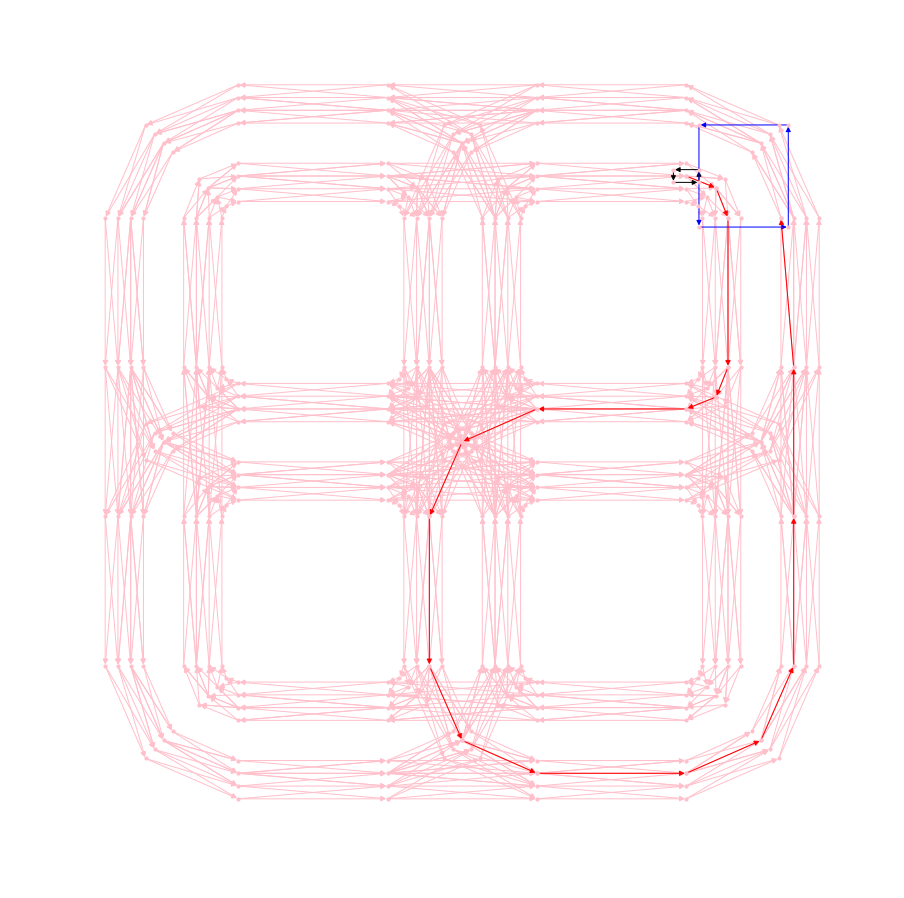

going to target_node
going to target_node
going to move_point
SE2Transform([2.4569999396800997, 2.3830127915449233],-1.5707963267948968)


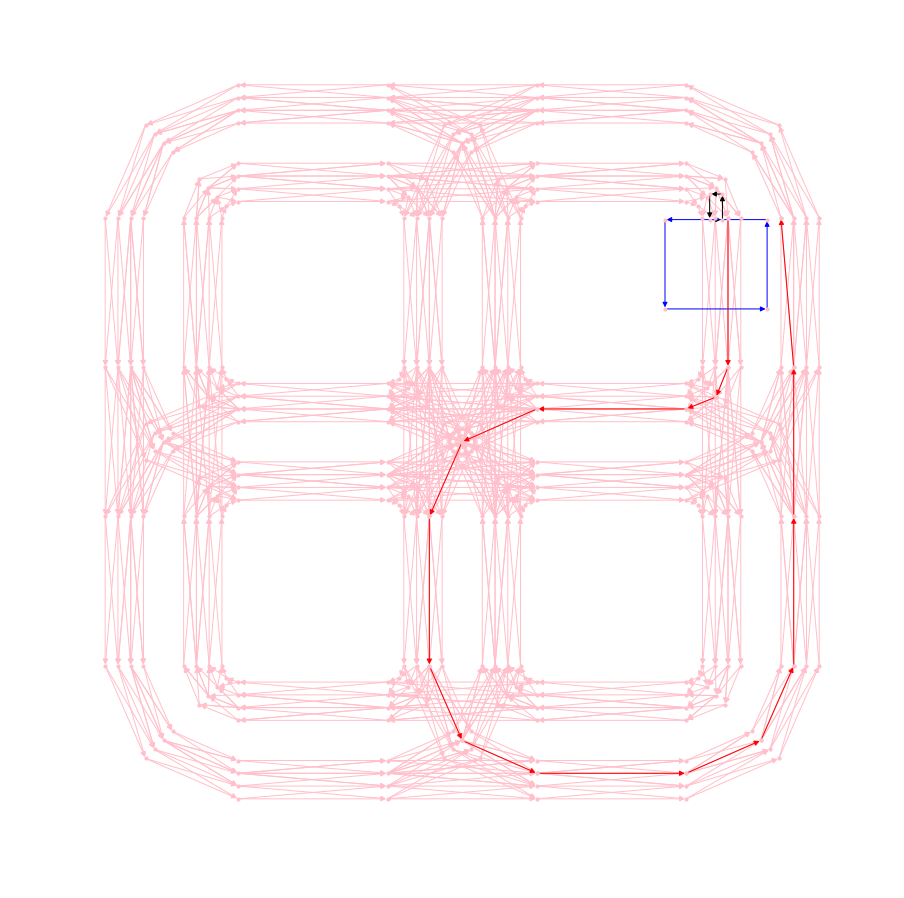

going to target_node
going to move_point
SE2Transform([2.503799937963486, 2.2035636320792076],-1.5707963267948968)


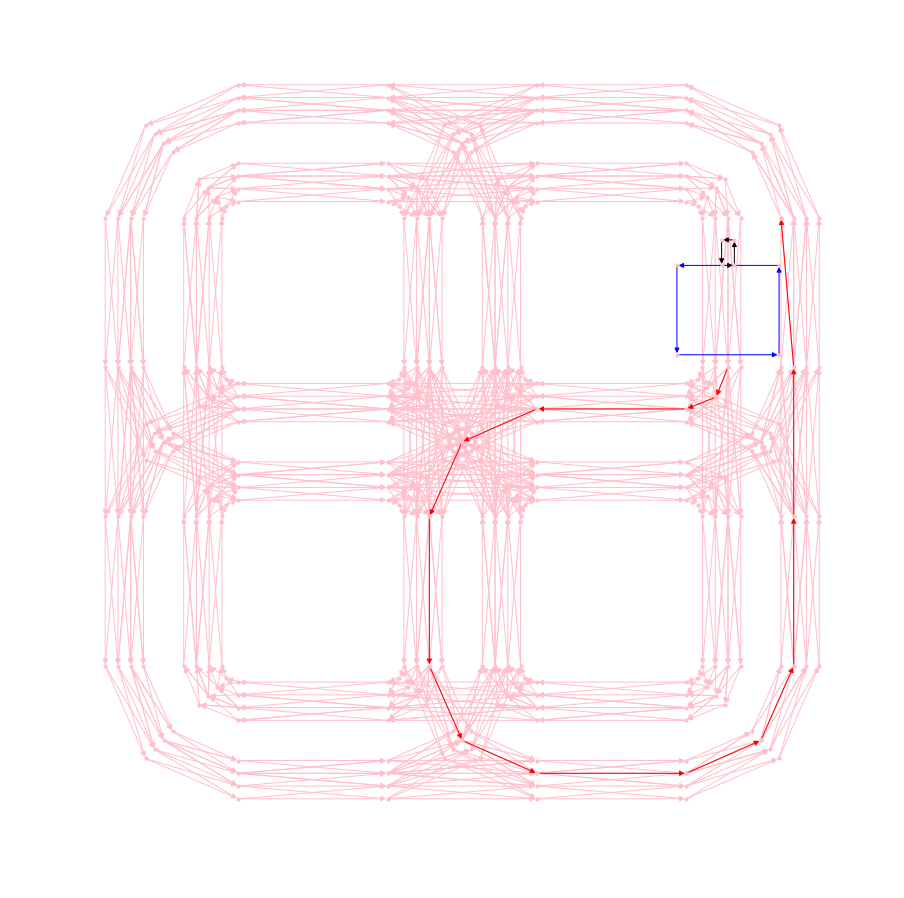

going to move_point
SE2Transform([2.503799937963486, 2.0035636320792074],-1.5707963267948968)


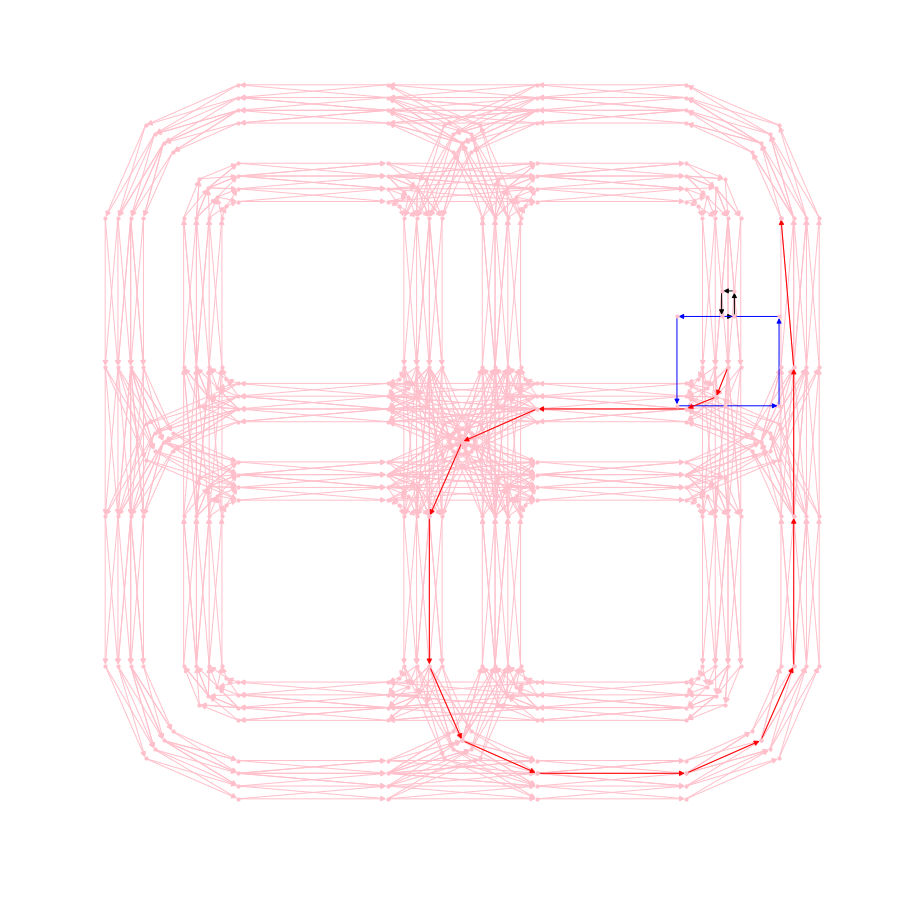

going to move_point
SE2Transform([2.503799937963486, 1.8035636320792074],-1.5707963267948968)


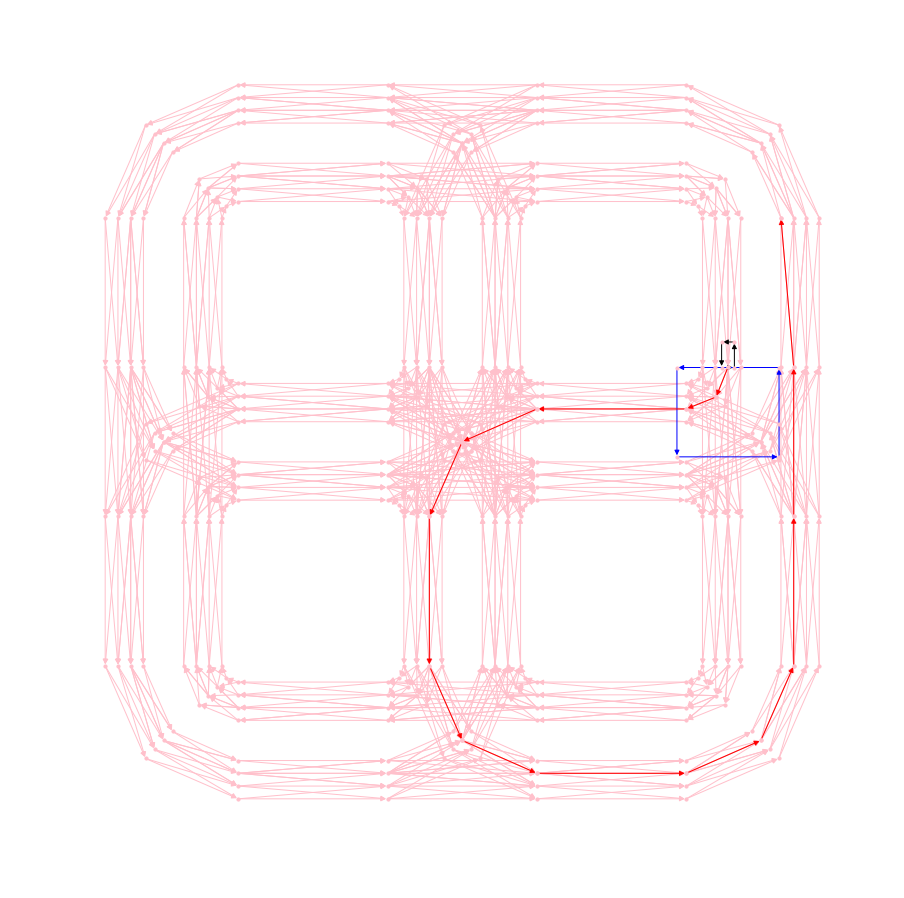

going to target_node
going to target_node
going to move_point
SE2Transform([2.4315764581948245, 1.6379999697208405],-3.141592653589793)


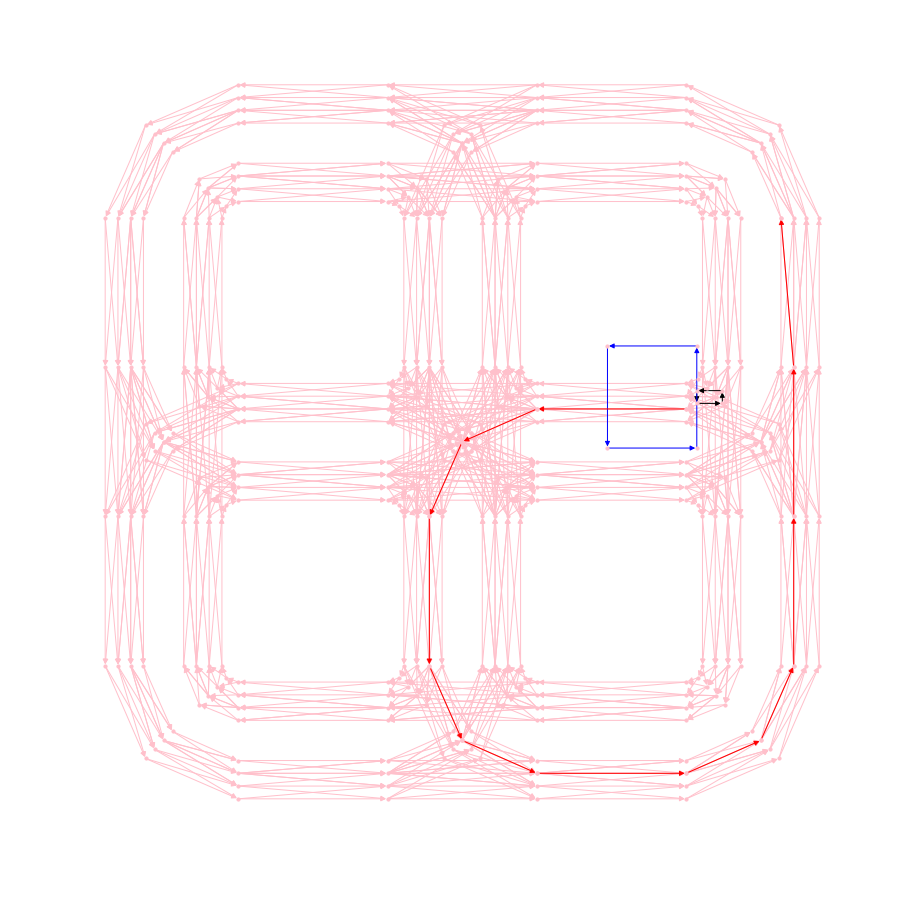

going to target_node
going to move_point
SE2Transform([2.2428420452560553, 1.5911999714374543],-3.141592653589793)


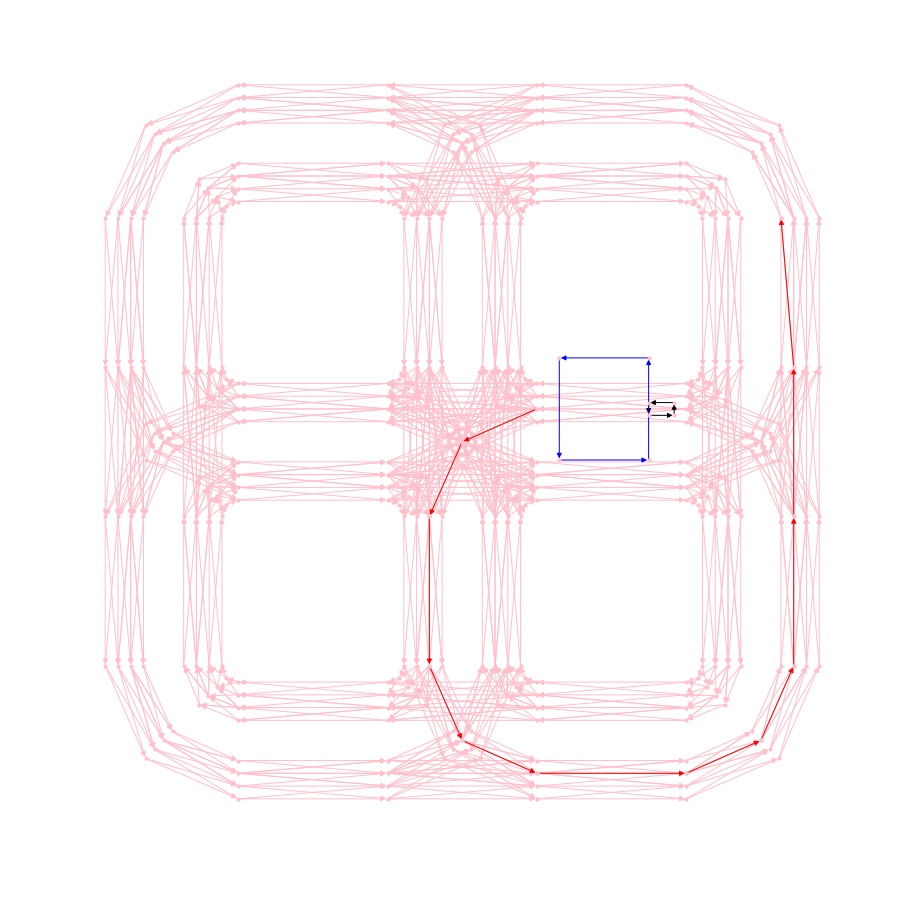

going to move_point
SE2Transform([2.042842045256055, 1.5911999714374543],-3.141592653589793)


In [ ]:
path_planner = uplan.PathPlanner(dt.get_map_current_graph())
_, random_end_node_name = dt.get_random_node_in_graph()
path = path_planner.get_shortest_path(my_duckie.get_current_positon(), random_end_node_name)
my_duckie.set_path(path)
for i in range(0, 50):
    dt.render_current_graph(save=True, folder='./data', file_index=i)
    my_duckie.move(1)
    
path

In [ ]:
# import subprocess
# import os
# os.chdir("./data")
# subprocess.call([
#     'ffmpeg', '-framerate', '8', '-i', 'file%02d.png', '-r', '30', '-pix_fmt', 'yuv420p',
#     'video_name.mp4'
# ])
# for file_name in glob.glob("*.png"):
#     os.remove(file_name)

In [ ]:
pwd